In [0]:
# Ce code "TP_CNN_TSP"est basé sur tensorflow et keras pour construire un modele CNN
# Ce code est basé sur le tutorial de CNN-tensorflow https://www.tensorflow.org/tutorials/images/cnn
#Pour lier google Colab avec google drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Pour importer les outils 
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, Model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
from matplotlib import pyplot
import h5py
from keras.preprocessing.image import img_to_array

TensorFlow is already loaded. Please restart the runtime to change versions.


Using TensorFlow backend.


# Nouvelle section

In [0]:
# Pour telécharger la database
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
num_classes =10

170500096/170498071 [==============================] - 11s 0us/step


In [0]:

from keras.utils import to_categorical
trainY = to_categorical(train_labels)
testY = to_categorical(test_labels)
print(testY.shape)

(10000, 10)


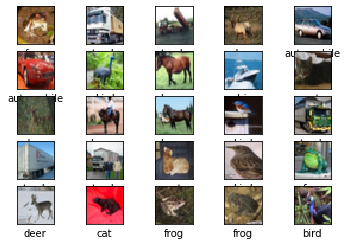

In [0]:
#Pour afficher 25 images de l'ensemble d'apprentissage
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [0]:
#VGG Model
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, Dense, AveragePooling2D,Flatten,Dropout,BatchNormalization,Conv2D,MaxPooling2D
from tensorflow.keras import Model,Sequential
from tensorflow.keras.optimizers import SGD, Adam
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)       

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import *
# prepare iterator
it_train = datagen.flow(train_images, trainY, batch_size=64)
# fit model
steps = int(train_images.shape[0] / 64)
filepath="/content/drive/My Drive/Models/VGG_CIFAR/cifar_vgglike_0803_epochs_{epoch:03d}_val_acc_{val_accuracy:.3f}.h5"
print(steps)
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, save_weights_only=False, mode='auto',period=10)
callbacks_list = [checkpoint]

history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100, validation_data=(test_images, testY), callbacks=callbacks_list, verbose=1)


# learning curves
summarize_diagnostics(history)

781
  ...
    to  
  ['...']
Train for 781 steps, validate on 10000 samples
Epoch 1/100
781/781 [==============================] - 26s 33ms/step - loss: 2.0813 - accuracy: 0.3042 - val_loss: 1.4934 - val_accuracy: 0.4466
Epoch 2/100
781/781 [==============================] - 25s 32ms/step - loss: 1.5996 - accuracy: 0.4121 - val_loss: 1.4706 - val_accuracy: 0.4717
Epoch 3/100
781/781 [==============================] - 25s 32ms/step - loss: 1.4830 - accuracy: 0.4553 - val_loss: 1.4965 - val_accuracy: 0.4634
Epoch 4/100
781/781 [==============================] - 25s 32ms/step - loss: 1.4058 - accuracy: 0.4886 - val_loss: 1.4953 - val_accuracy: 0.4656
Epoch 5/100
781/781 [==============================] - 25s 32ms/step - loss: 1.3454 - accuracy: 0.5113 - val_loss: 1.2295 - val_accuracy: 0.5558
Epoch 6/100
781/781 [==============================] - 25s 32ms/step - loss: 1.3001 - accuracy: 0.5309 - val_loss: 1.2910 - val_accuracy: 0.5410
Epoch 7/100
781/781 [==============================] -

KeyError: ignored

In [0]:
#VGG Model
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, Dense, AveragePooling2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras import Model
VGG_input=Input(shape=train_images.shape[1:])
VGG_model=keras.applications.vgg19.VGG19(include_top=False, weights="imagenet" , input_tensor=VGG_input)
#for layer in VGG_model.layers[:-4]:
  #print(layer.name)
  #layer.trainable = False
vgg=VGG_model.get_layer('block5_pool').output

x=Flatten()(vgg)

x=Dense(128,activation='relu', kernel_initializer='he_uniform')(x)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)
x=Dense(10,activation='softmax')(x)
model=Model(inputs=VGG_model.input, outputs=x, name='vgg_cifar')
model.summary()


**Report assigments**

intro(R)
database(R)

model(M) test(M)

training (performance confusion metrix)(D)
result(D)






In [0]:
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import *
#v_optimizer = SGD(lr=1e-2, decay=1e-6, momentum=0.9, nesterov=True)
v_optimizer = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, amsgrad=True)
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
it_train = datagen.flow(train_images, train_labels, batch_size=64)
steps = int(train_images.shape[0] / 64)
print(steps)
filepath="/content/drive/My Drive/Models/VGG_CIFAR/cifar_0803_epochs_{epoch:03d}_val_acc_{val_accuracy:.3f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, save_weights_only=False, mode='auto',period=5)
callbacks_list = [checkpoint]

model.compile(optimizer=v_optimizer,
              loss='sparse_categorical_crossentropy',
              
              metrics=['accuracy'])

history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=50, validation_data=(test_images, test_labels),callbacks=callbacks_list)


781
  ...
    to  
  ['...']
Train for 781 steps, validate on 10000 samples
Epoch 1/50
781/781 [==============================] - 85s 108ms/step - loss: 1.8573 - accuracy: 0.2162 - val_loss: 1.8360 - val_accuracy: 0.2356
Epoch 2/50
781/781 [==============================] - 83s 106ms/step - loss: 1.7275 - accuracy: 0.2830 - val_loss: 1.6069 - val_accuracy: 0.3236
Epoch 3/50
781/781 [==============================] - 83s 106ms/step - loss: 1.6515 - accuracy: 0.3228 - val_loss: 2.1954 - val_accuracy: 0.2200
Epoch 4/50
781/781 [==============================] - 83s 106ms/step - loss: 1.6066 - accuracy: 0.3429 - val_loss: 1.7716 - val_accuracy: 0.2504
Epoch 5/50
320/781 [===========>..................] - ETA: 46s - loss: 1.5857 - accuracy: 0.3472

In [0]:
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import *
#v_optimizer = SGD(lr=1e-2, decay=1e-6, momentum=0.9, nesterov=True)
v_optimizer = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, amsgrad=True)

filepath="/content/drive/My Drive/Models/VGG_CIFAR/cifar_0803_epochs_{epoch:03d}_val_acc_{val_accuracy:.3f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, save_weights_only=False, mode='auto',period=5)
callbacks_list = [checkpoint]

model.compile(optimizer=v_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels),batch_size=32,callbacks=callbacks_list)


Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 131s 3ms/sample - loss: 1.9429 - accuracy: 0.2249 - val_loss: 1.8864 - val_accuracy: 0.2173
Epoch 2/15
50000/50000 [==============================] - 130s 3ms/sample - loss: 1.6252 - accuracy: 0.3560 - val_loss: 1.4542 - val_accuracy: 0.4288
Epoch 3/15
50000/50000 [==============================] - 130s 3ms/sample - loss: 1.3506 - accuracy: 0.4969 - val_loss: 1.2016 - val_accuracy: 0.5656
Epoch 4/15
50000/50000 [==============================] - 130s 3ms/sample - loss: 1.1035 - accuracy: 0.6092 - val_loss: 1.0165 - val_accuracy: 0.6473
Epoch 5/15
49984/50000 [============================>.] - ETA: 0s - loss: 0.9556 - accuracy: 0.6660
Epoch 00005: saving model to /content/drive/My Drive/Models/VGG_CIFAR/cifar_0803_epochs_005_val_acc_0.673.h5
50000/50000 [==============================] - 132s 3ms/sample - loss: 0.9557 - accuracy: 0.6660 - val_loss: 0.9810 - val_accuracy: 0.6726
Ep

KeyboardInterrupt: ignored

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#load the saved model*
from tensorflow.keras.models import load_model
saved_model=load_model("/content/drive/My Drive/Models/VGG_CIFAR/cifar_vgglike_0803_epochs_400_val_acc_0.882.h5")
saved_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_38 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 16, 16, 32)        0         
_______________________________________

fp, fn,tp ,tn

In [0]:
#model=load_model("/content/drive/My Drive/Colab Notebooks/my_model_5.h5")

In [0]:
# Pour tracer la courbe accuracy en foctions de nombre des epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


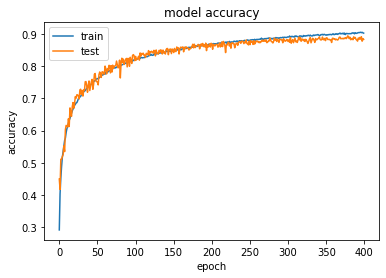

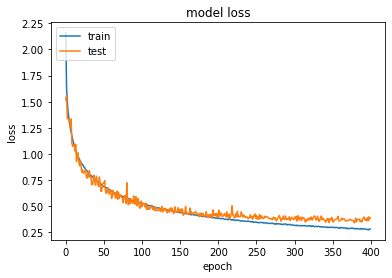

In [0]:
from matplotlib import pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
predicted_labels=saved_model.predict(test_images)

class_labels = np.argmax(predicted_labels, axis=1)
cm=confusion_matrix(test_labels, class_labels)

print(cm)
#[tn,fp,fn,tp] = confusion_matrix(test_labels, class_labels).ravel()

[[888  10  21   5  12   0   9   7  34  14]
 [  4 959   0   0   0   1   2   0   8  26]
 [ 26   1 813  19  28  30  52  19   8   4]
 [  9   2  24 694  38 116  77  24   7   9]
 [  4   1  27  13 867   8  57  22   1   0]
 [  4   2  16  63  28 836  26  23   1   1]
 [  3   1   7   5   5   3 973   2   0   1]
 [  3   0   3   9  32  21  14 913   3   2]
 [ 26   7   5   0   3   1   4   1 941  12]
 [ 11  33   2   1   0   0   3   1  11 938]]


In [0]:
print(test_acc)

0.7003


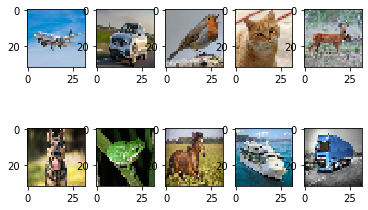

In [0]:
#pour importer l'image chien.jpg
import os
import numpy
class_names = ['airpl', 'auto', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']
imgs=[]#numpy.zeros(10,32,32,3)
for i in numpy.arange(10):
  img = cv2.imread("/content/sample_data/test/"+class_names[i]+".jpg")
  img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.subplot(2,5,i+1)
  img = cv2.resize(img_cvt, (32,32))
  img = img.astype('float32')
  img= img / 255.0
  imgs.append(img)
  plt.imshow(imgs[i])
  #plt.show()
plt.show()

In [0]:

imgs=numpy.array(imgs)
print(imgs.shape)

(10, 32, 32, 3)


In [0]:

Ypredicted=saved_model.predict(imgs)
print(Ypredicted[7])

[2.6691507e-04 2.2489289e-06 1.4552403e-03 4.4525340e-03 4.5368597e-01
 2.2377215e-02 8.1039284e-04 5.1692730e-01 1.5983755e-05 6.2308891e-06]


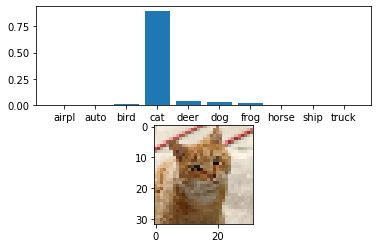

In [0]:
class_names = ['airpl', 'auto', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']
plt.subplot(2,1,1)
plt.bar(class_names,Ypredicted[3])
plt.subplot(2,1,2)
plt.imshow(imgs[3])

In [0]:
y = [cm[idx,idx]/1000 for idx in numpy.arange(10)]
print(y)

[0.888, 0.959, 0.813, 0.694, 0.867, 0.836, 0.973, 0.913, 0.941, 0.938]


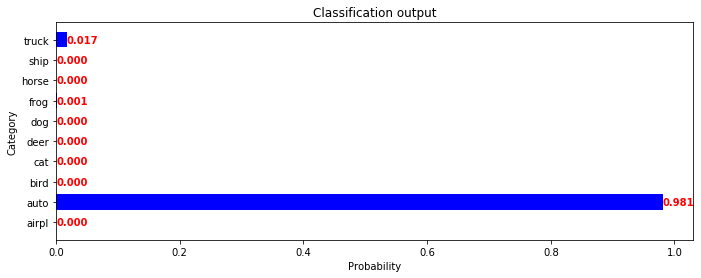

In [0]:
#plotting
import os
import numpy as np
import matplotlib.pyplot as plt
idx=4
x = class_names
y=Ypredicted[1]
#y = [cm[idx,idx]/1000 for idx in numpy.arange(10)]

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind)
ax.set_yticklabels(x, minor=False)
fig.subplots_adjust(right=1.6)
for i, v in enumerate(y):
    ax.text(v, i,"{:.3f}".format(v),verticalalignment='center', color='red', fontweight='bold')
plt.title('Classification output')
plt.xlabel('Probability')
plt.ylabel('Category')      
#plt.show()
plt.savefig(os.path.join('accPerCate'+str(idx)+'.png'), dpi=300, format='png', bbox_inches='tight')

automobile


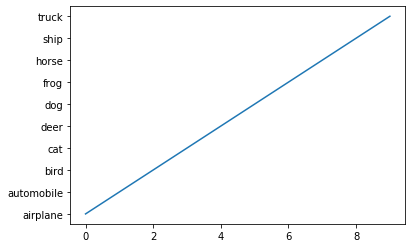

In [0]:
class_labels = np.argmax(Ypredicted, axis=1)
print(class_names[class_labels[1]])
plt.plot(class_names)

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9_input (InputLayer)  [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_17 (Activation)   (None, 30, 30, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


IndexError: ignored

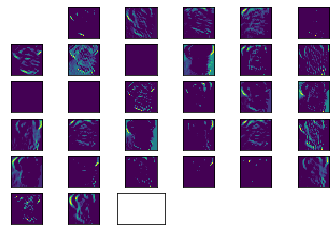

In [0]:
#pour visualiser la couche i


model2 = Model(inputs=model.inputs, outputs=model.layers[1].output)
model2.summary()
feature_maps = model2.predict(imgs)
square = 6
ix = 2
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1])
		ix += 1
# show the figure
pyplot.show()